<a href="https://colab.research.google.com/github/gabrielcn/Bike_Sharing/blob/main/cyclistic_bike_share_chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Compartilhamento de bicicletas em Chicago - 2016 (Divvy)***


In [1]:
import pandas as pd #Importa a biblioteca pandas para ler o arquivo
import seaborn as sns #Importa a biblioteca seaborn
import matplotlib.pyplot as plt #Importa a bilbioteca matplotlib
import csv 
import numpy as np
from datetime import datetime #operações para analisar datas

In [2]:
df_chicago = pd.read_excel("Chicago-2016-Summary.xlsx") #Atribui a uma variável 

In [3]:
df_chicago

,duration,month,hour,day_of_week,user_type
0,1.543333e+16,3,23,Thursday,Subscriber
1,3.300000e+00,3,22,Thursday,Subscriber
2,2.066667e+15,3,22,Thursday,Subscriber
3,1.968333e+16,3,22,Thursday,Subscriber
4,1.093333e+16,3,22,Thursday,Subscriber
...,...,...,...,...,...
72126,3.883333e+16,10,1,Saturday,Subscriber
72127,7.866667e+15,10,1,Saturday,Subscriber
72128,1.781667e+16,10,0,Saturday,Customer
72129,2.486667e+16,10,0,Saturday,Subscriber


In [4]:
df_chicago.shape #Formato da tabela

(72131, 5)

**Formatando e explorando o data set**

In [5]:
df_chicago.columns = ["duracao" , "mes" , "hora" , "dia_semana", "tipo_usuario"] #renomear colunas [] lista (columns é um atributo do pandas)
df_chicago.head()

,duracao,mes,hora,dia_semana,tipo_usuario
0,1.543333e+16,3,23,Thursday,Subscriber
1,3.300000e+00,3,22,Thursday,Subscriber
2,2.066667e+15,3,22,Thursday,Subscriber
3,1.968333e+16,3,22,Thursday,Subscriber
4,1.093333e+16,3,22,Thursday,Subscriber


In [6]:
df_chicago['mes'].unique() #Todos os valores que foram colocados na coluna mes

array([ 3,  2,  1,  4,  5,  6,  9,  8,  7, 12, 11, 10])

In [7]:
df_chicago['mes'].value_counts() #Quantas vezes em cada mes

7     10286
8      9810
6      9794
9      8700
5      7211
10     7160
11     4811
4      4567
3      3719
2      2394
1      1901
12     1778
Name: mes, dtype: int64

**Análise de viagens por dia de todos os usuários**

In [8]:
df_chicago['dia_semana'].value_counts() #Quantas vezes em cada dia

Monday       11286
Tuesday      10911
Friday       10741
Thursday     10008
Saturday      9927
Sunday        9654
Wednesday     9604
Name: dia_semana, dtype: int64

**Quantidade de viagens por dia no ano de 2016**

In [9]:
qtd_viagem_por_dia_chicago = df_chicago['dia_semana'].value_counts() #Quantas vezes em cada dia

In [10]:
qtd_viagem_por_dia_chicago #Chicago

Monday       11286
Tuesday      10911
Friday       10741
Thursday     10008
Saturday      9927
Sunday        9654
Wednesday     9604
Name: dia_semana, dtype: int64

In [11]:
qtd_viagem_por_dia_chicago.to_frame()

,dia_semana
Monday,11286
Tuesday,10911
Friday,10741
Thursday,10008
Saturday,9927
Sunday,9654
Wednesday,9604


In [12]:
df_qtd_viagem_por_dia_chicago = qtd_viagem_por_dia_chicago.to_frame().reset_index()

In [13]:
df_qtd_viagem_por_dia_chicago #Quantidade total de viagens por dia em 2016

,index,dia_semana
0,Monday,11286
1,Tuesday,10911
2,Friday,10741
3,Thursday,10008
4,Saturday,9927
5,Sunday,9654
6,Wednesday,9604


In [14]:
df_qtd_viagem_por_dia_chicago.columns = ["dias", "total"]
df_qtd_viagem_por_dia_chicago

,dias,total
0,Monday,11286
1,Tuesday,10911
2,Friday,10741
3,Thursday,10008
4,Saturday,9927
5,Sunday,9654
6,Wednesday,9604


**Frequencia de viagens por dia da semana de todos os usuários**

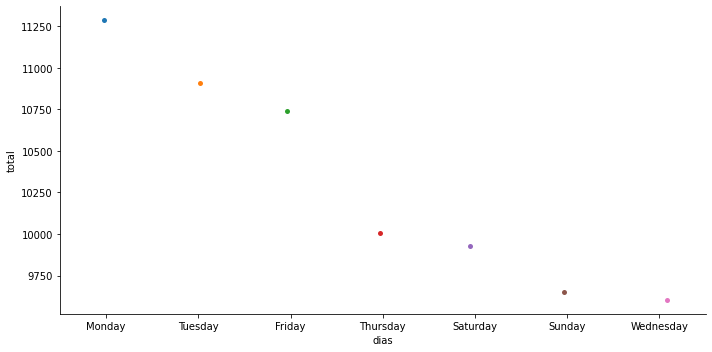

In [15]:
sns.catplot(x="dias", y="total", data = df_qtd_viagem_por_dia_chicago, aspect = 2)

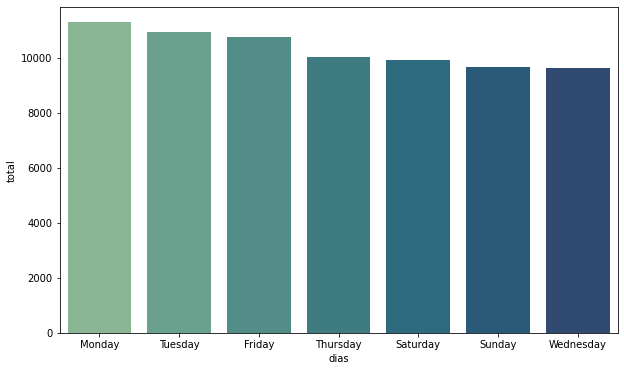

In [16]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="dias", y="total", data = df_qtd_viagem_por_dia_chicago, palette = "crest") #pallete, atributo que permite escolher um palete de cor, no caso é crest

**Análise de usuários de (tipo/hora/mes)**



In [17]:
df_chicago

,duracao,mes,hora,dia_semana,tipo_usuario
0,1.543333e+16,3,23,Thursday,Subscriber
1,3.300000e+00,3,22,Thursday,Subscriber
2,2.066667e+15,3,22,Thursday,Subscriber
3,1.968333e+16,3,22,Thursday,Subscriber
4,1.093333e+16,3,22,Thursday,Subscriber
...,...,...,...,...,...
72126,3.883333e+16,10,1,Saturday,Subscriber
72127,7.866667e+15,10,1,Saturday,Subscriber
72128,1.781667e+16,10,0,Saturday,Customer
72129,2.486667e+16,10,0,Saturday,Subscriber


In [18]:
df_chicago.loc[df_chicago.tipo_usuario=='Subscriber'].value_counts().sum() #Localiza a coluna tipo_usuario e conta todos que são "Subscriber" e a função sum, soma tudo.
#Obs: Não sabemos se tem usuário repetido na tabela, vamos usar a abordagem de frequencia para saber se usuários cadastrados são mais frequentes que usuários customizados

54982

In [19]:
subscriber_chicago = df_chicago.loc[df_chicago.tipo_usuario=='Subscriber'].value_counts().sum()

In [20]:
df_chicago.loc[df_chicago.tipo_usuario=='Customer'].value_counts().sum() #Localiza a coluna tipo_usuario e conta todos que são "Customer" e a função sum, soma tudo.
#Obs: Não sabemos se tem usuário repetido na tabela, vamos usar a abordagem de frequencia para saber se usuários cadastrados são mais frequentes que usuários customizados

17149

In [21]:
customer_chicago = df_chicago.loc[df_chicago.tipo_usuario=='Customer'].value_counts().sum()

In [22]:
54982 + _

72131

**Frequencia dos tipos de usuários em relação ao horário**

Quartis: Os quartis dividem os dados em quatro partes. Ordenando os dados cada quartil vai possuir 25% das observações. Ou seja, os primeiros 25% das observação estarão até o corte do 1º quartil, os próximos 25% até o corte do 2º quartil, etc.

Limites: O limite inferior é calculado sendo, geralmente, 1,5 vezes o corte do 1º quartil e o limite superior sendo 1,5 vezes o corte do 3º quartil.
O corte do segundo quartil é igual a mediana.

Outliers são observações atípicas, muito afastadas da maioria dos dados. Num boxplot esses valores ficam abaixo do limite inferior ou acima do limite superior.

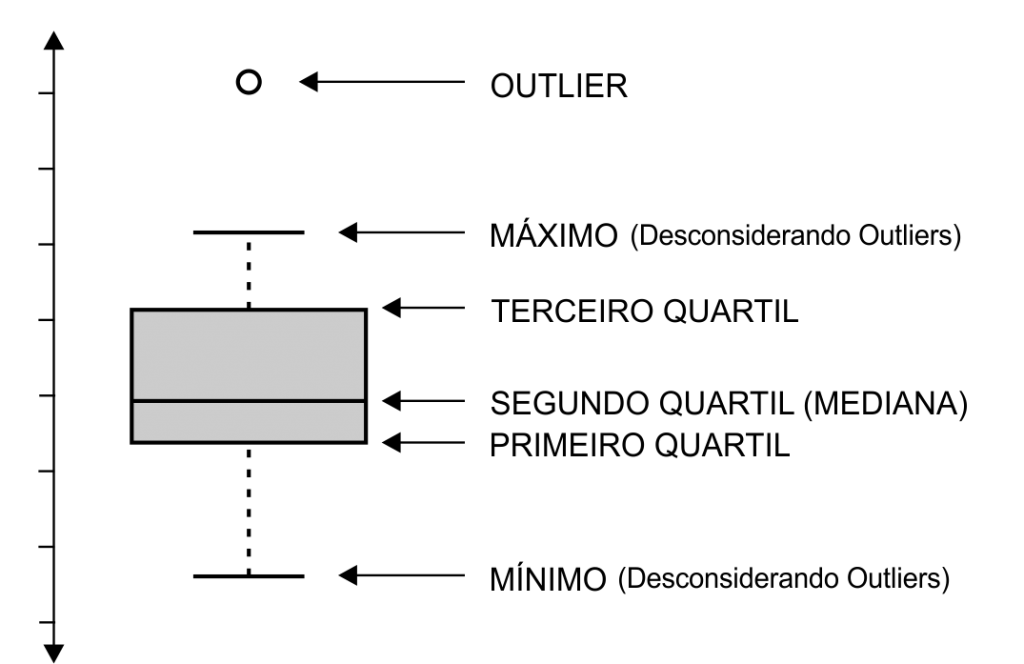

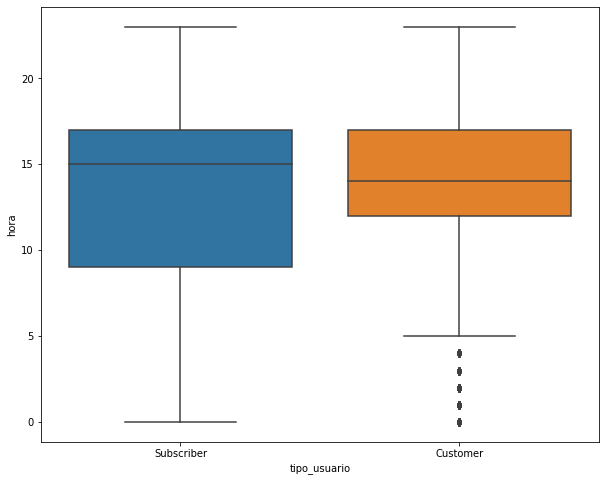

In [23]:
plt.figure(figsize=(10,8)) #Configura o tamanho da figura (10 para direita e 8 para baixo)
sns.boxplot(x="tipo_usuario", y="hora", data = df_chicago) 
# Grafico mostra que mostra a frequencia dos tipos de usuários em relação ao horário e o desvio padrão (standart deviation)

In [24]:
df_chicago.groupby("tipo_usuario").median()["hora"] # Mediana

tipo_usuario
Customer      14.0
Subscriber    15.0
Name: hora, dtype: float64

**Análise de viagens por hora e por mes**

In [25]:
#Substitui valores da coluna por condição em pandas
df_chicago.loc[df_chicago.mes==1, "mes"]='jan'
df_chicago.loc[df_chicago.mes==2, "mes"]='fev'
df_chicago.loc[df_chicago.mes==3, "mes"]='mar'
df_chicago.loc[df_chicago.mes==4, "mes"]='abr'
df_chicago.loc[df_chicago.mes==5, "mes"]='mai'
df_chicago.loc[df_chicago.mes==6, "mes"]='jun'
df_chicago.loc[df_chicago.mes==7, "mes"]='jul'
df_chicago.loc[df_chicago.mes==8, "mes"]='ago'
df_chicago.loc[df_chicago.mes==9, "mes"]='set'
df_chicago.loc[df_chicago.mes==10, "mes"]='out'
df_chicago.loc[df_chicago.mes==11, "mes"]='nov'
df_chicago.loc[df_chicago.mes==12, "mes"]='dez'

In [26]:
df_chicago['mes'].value_counts() #Quantidade de viagens por mes em Chicago

jul    10286
ago     9810
jun     9794
set     8700
mai     7211
out     7160
nov     4811
abr     4567
mar     3719
fev     2394
jan     1901
dez     1778
Name: mes, dtype: int64

In [27]:
qtd_viagem_mes_chicago = df_chicago['mes'].value_counts() 

In [28]:
qtd_viagem_mes_chicago = qtd_viagem_mes_chicago.to_frame().reset_index()

In [29]:
qtd_viagem_mes_chicago

,index,mes
0,jul,10286
1,ago,9810
2,jun,9794
3,set,8700
4,mai,7211
5,out,7160
6,nov,4811
7,abr,4567
8,mar,3719
9,fev,2394


In [30]:
qtd_viagem_mes_chicago.columns = ["mes", "total"]
qtd_viagem_mes_chicago

,mes,total
0,jul,10286
1,ago,9810
2,jun,9794
3,set,8700
4,mai,7211
5,out,7160
6,nov,4811
7,abr,4567
8,mar,3719
9,fev,2394


**Análise geral por mes (todos os usuários, customer e subscriber)**

**Opção 1**

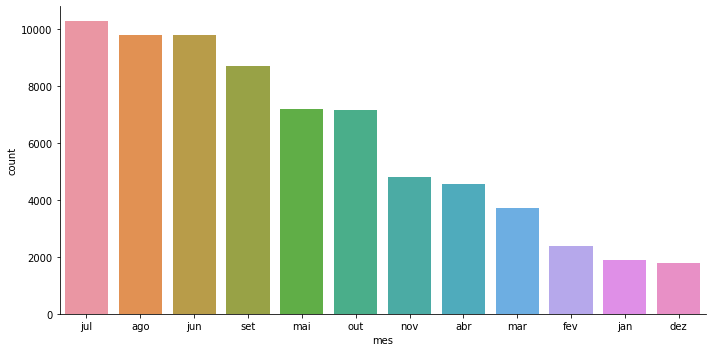

In [31]:
sns.catplot(x="mes", kind="count", data = df_chicago, aspect = 2, order = df_chicago['mes'].value_counts().index) 
# usando alto nível, o sns.catplot vai plotar categoricamente as categorias de "mes", de maneira que conte (kind="count") quantas vezes aparece, e o data = df_chicago (está usando o DF df_chicago que importamos)
# aspect configura o tamanho da figura, colocando o 2 para trazer o dobro (retangulo) do quadrado.
# E o order define a ordem como é apresentado o gráfico, no caso é a ordem da série df_chicago['mes'].value_counts().index e o ".index" é o indice que está definida a ordem. index da série.

**Opção 2**

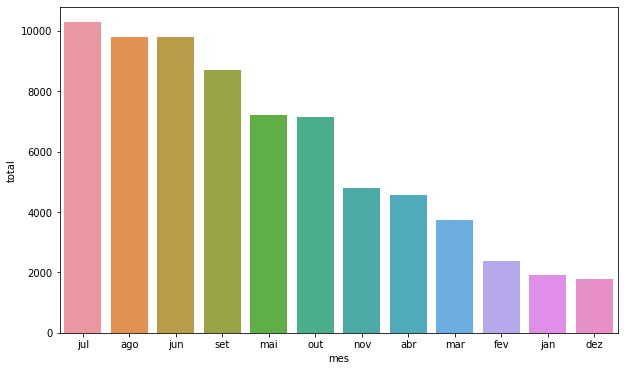

In [32]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="mes", y="total", data = qtd_viagem_mes_chicago)

**Análise por horário (todos os usuários)**

In [33]:
df_chicago['hora'].unique()

array([23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  4,  0,  5,  2,  3,  1])

In [34]:
df_chicago['hora'].value_counts() #Quantidade de viagens no ano de 2016 por horário

17    8564
16    6622
18    5786
8     5454
15    4739
13    4313
7     4256
12    4208
14    4199
19    3905
11    3693
9     3190
10    2820
20    2519
6     2024
21    1925
22    1346
23     822
5      538
0      482
1      326
2      175
4      137
3       88
Name: hora, dtype: int64

In [35]:
qtd_viagem_hora_chicago = df_chicago['hora'].value_counts()

In [36]:
qtd_viagem_hora_chicago

17    8564
16    6622
18    5786
8     5454
15    4739
13    4313
7     4256
12    4208
14    4199
19    3905
11    3693
9     3190
10    2820
20    2519
6     2024
21    1925
22    1346
23     822
5      538
0      482
1      326
2      175
4      137
3       88
Name: hora, dtype: int64

In [37]:
qtd_viagem_hora_chicago.to_frame().reset_index()

,index,hora
0,17,8564
1,16,6622
2,18,5786
3,8,5454
4,15,4739
5,13,4313
6,7,4256
7,12,4208
8,14,4199
9,19,3905


In [38]:
qtd_viagem_hora_chicago = qtd_viagem_hora_chicago.to_frame().reset_index()

In [39]:
qtd_viagem_hora_chicago

,index,hora
0,17,8564
1,16,6622
2,18,5786
3,8,5454
4,15,4739
5,13,4313
6,7,4256
7,12,4208
8,14,4199
9,19,3905


In [40]:
qtd_viagem_hora_chicago.columns = ["hora", "total"]
qtd_viagem_hora_chicago

,hora,total
0,17,8564
1,16,6622
2,18,5786
3,8,5454
4,15,4739
5,13,4313
6,7,4256
7,12,4208
8,14,4199
9,19,3905


**Análise por hora de todos os usuários**

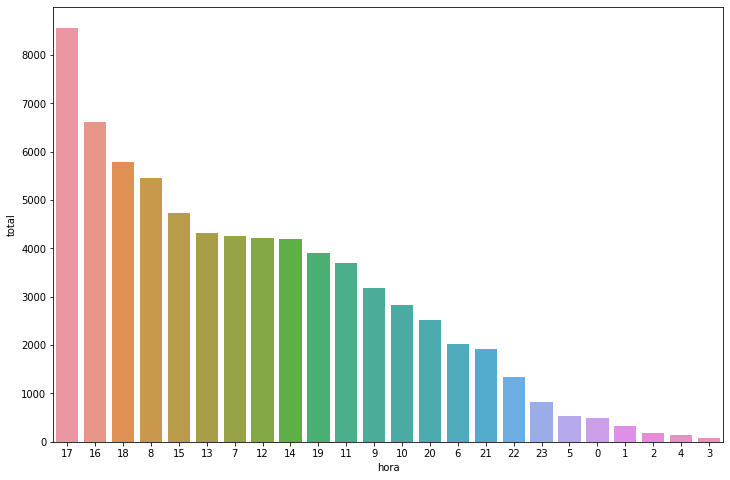

In [41]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (12 para direita e 8 para baixo)
sns.barplot(x="hora", y="total", data = qtd_viagem_hora_chicago, order = df_chicago['hora'].value_counts().index)
# Quantidade total de viagens de todos os usuários por horário

**Quantidade de usuários por categoria (Subscriber e Customer)**

In [42]:
subscriber_chicago

54982

In [43]:
customer_chicago

17149

In [44]:
df_usuarios_chicago = {
    'tipo' : ['subscriber', 'customer'],
    'total' : [subscriber_chicago, customer_chicago]
    # {} dicionário do python
}

df_usuarios_chicago

{'tipo': ['subscriber', 'customer'], 'total': [54982, 17149]}

In [45]:
pd.DataFrame(df_usuarios_chicago) #Cria ou transforma em dataframe em cima de 'df_usuarios_chicago' que acabei de criar como dicionario

,tipo,total
0,subscriber,54982
1,customer,17149


In [46]:
df_usuarios_chicago = pd.DataFrame(df_usuarios_chicago) #É um costume sobrescrever a variável, mas não é necessário
df_usuarios_chicago

,tipo,total
0,subscriber,54982
1,customer,17149


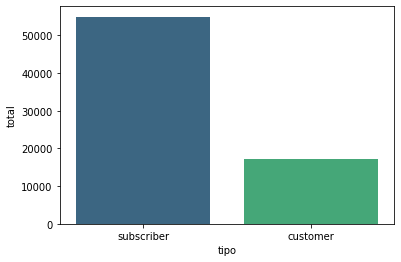

In [47]:
sns.barplot(x="tipo", y="total", data = df_usuarios_chicago, palette = "viridis") #Gráfico de barras com seaborn, definindo o "tipo" no eixo x e o "total" no eixo y, extraido do DF df_usuarios_chicago


**Duração média de viagem por tipo de usuário**

In [48]:
df_chicago.groupby("tipo_usuario").mean()["duracao"] # Duração média por tipo de usuário

tipo_usuario
Customer      1.216451e+16
Subscriber    8.572488e+15
Name: duracao, dtype: float64

** *texto em itálico*Mediana por tipo de usuário**

In [49]:
df_chicago.groupby("tipo_usuario").median()["duracao"] # Mediana

tipo_usuario
Customer      9.633333e+15
Subscriber    6.733333e+15
Name: duracao, dtype: float64

**Explorando a frequencia (mes e hora) de usuários customizados e usuários cadastrados**

In [50]:
total_tipo_usuarios_chicago = df_chicago.tipo_usuario.value_counts()

In [51]:
total_tipo_usuarios_chicago

Subscriber    54982
Customer      17149
Name: tipo_usuario, dtype: int64

In [52]:
df_chicago2 = df_chicago.copy() #Cria uma cópia do df_chicago_copy

In [53]:
df_chicago2

,duracao,mes,hora,dia_semana,tipo_usuario
0,1.543333e+16,mar,23,Thursday,Subscriber
1,3.300000e+00,mar,22,Thursday,Subscriber
2,2.066667e+15,mar,22,Thursday,Subscriber
3,1.968333e+16,mar,22,Thursday,Subscriber
4,1.093333e+16,mar,22,Thursday,Subscriber
...,...,...,...,...,...
72126,3.883333e+16,out,1,Saturday,Subscriber
72127,7.866667e+15,out,1,Saturday,Subscriber
72128,1.781667e+16,out,0,Saturday,Customer
72129,2.486667e+16,out,0,Saturday,Subscriber


Obs: O Pandas permite filtrar um DataFrame pelos dados de sua coluna. Por exemplo, queremos pegar do data frame de chicago a coluna que define o tipe de usuario e com base nisso, queremos as linhas que são iguais a "Subscriber"

**Criando um DF para usuários Subscriber e outro para Customer**

**Explorando de usuários Subscriber por mes**

In [54]:
filtro_sub_chicago = df_chicago2['tipo_usuario'] == "Subscriber" #Filtra só usuários Subscriber na coluna 'tipo_usuario' e armazena no filtro_sub_chicago

In [55]:
subscriber_chicago = df_chicago2[filtro_sub_chicago] #Utiliza o filtro armazenado em 'filtro_sub_chicago' no df_chicago2 (cópia do df_chicago) e armazena na variável subscriber_chicago

In [56]:
subscriber_chicago #Data frame só com os usuários cadastrados

,duracao,mes,hora,dia_semana,tipo_usuario
0,1.543333e+16,mar,23,Thursday,Subscriber
1,3.300000e+00,mar,22,Thursday,Subscriber
2,2.066667e+15,mar,22,Thursday,Subscriber
3,1.968333e+16,mar,22,Thursday,Subscriber
4,1.093333e+16,mar,22,Thursday,Subscriber
...,...,...,...,...,...
72125,2.073333e+16,out,1,Saturday,Subscriber
72126,3.883333e+16,out,1,Saturday,Subscriber
72127,7.866667e+15,out,1,Saturday,Subscriber
72129,2.486667e+16,out,0,Saturday,Subscriber


In [57]:
subscriber_chicago.mes.value_counts()

jun    7182
ago    7053
jul    6963
set    6346
out    5668
mai    5199
nov    4144
abr    3550
mar    3154
fev    2166
jan    1839
dez    1718
Name: mes, dtype: int64

In [58]:
freq_sub_mes_chicago = subscriber_chicago.mes.value_counts()

In [59]:
freq_sub_mes_chicago.to_frame() #Transforma uma serie em DataFrame

,mes
jun,7182
ago,7053
jul,6963
set,6346
out,5668
mai,5199
nov,4144
abr,3550
mar,3154
fev,2166


In [60]:
freq_sub_mes_chicago.to_frame().reset_index() #reseta o index, adicionando mais uma coluna

,index,mes
0,jun,7182
1,ago,7053
2,jul,6963
3,set,6346
4,out,5668
5,mai,5199
6,nov,4144
7,abr,3550
8,mar,3154
9,fev,2166


In [61]:
freq_sub_mes_chicago = freq_sub_mes_chicago.to_frame().reset_index()

In [62]:
freq_sub_mes_chicago.columns = ["mes", "total"] # Renomeia as colunas do DataFrame
freq_sub_mes_chicago

,mes,total
0,jun,7182
1,ago,7053
2,jul,6963
3,set,6346
4,out,5668
5,mai,5199
6,nov,4144
7,abr,3550
8,mar,3154
9,fev,2166


**Frequencia de usuários Subscriber (cadastrado) por mes**

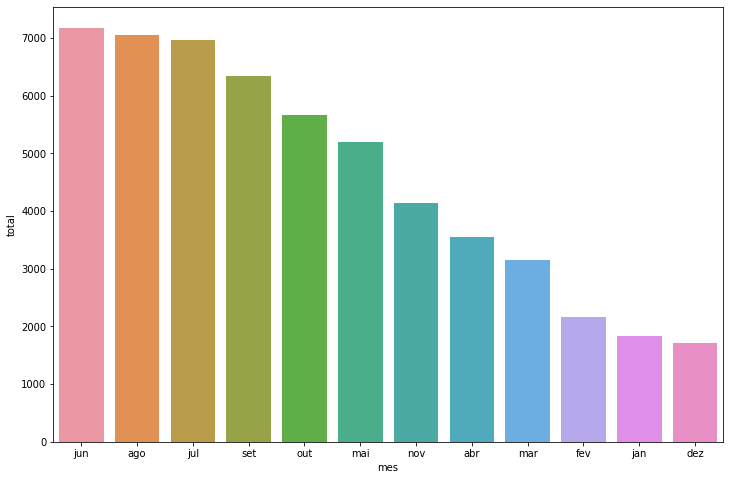

In [63]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (12 para direita e 8 para baixo)
sns.barplot(x="mes", y="total", data = freq_sub_mes_chicago)

In [64]:
# plt.figure(figsize=(10,6))
# sns.lineplot(data = freq_sub_mes_chicago, x="mes", y="total", color = "green")
# Gráfico de linha (em construção)

**Explorando de usuários Customer por mes**

In [65]:
filtro_cust_chicago = df_chicago2['tipo_usuario'] == "Customer" 

In [66]:
customer_chicago = df_chicago2[filtro_cust_chicago]

In [67]:
customer_chicago

,duracao,mes,hora,dia_semana,tipo_usuario
23,2.181667e+16,mar,18,Thursday,Customer
39,2.231667e+16,mar,17,Thursday,Customer
63,2.636667e+16,mar,16,Thursday,Customer
65,1.233333e+16,mar,16,Thursday,Customer
69,2.570000e+01,mar,15,Thursday,Customer
...,...,...,...,...,...
72121,8.650000e+00,out,5,Saturday,Customer
72122,3.736667e+15,out,4,Saturday,Customer
72123,8.850000e+00,out,2,Saturday,Customer
72124,2.036667e+16,out,2,Saturday,Customer


In [68]:
customer_chicago.mes.value_counts()

jul    3323
ago    2757
jun    2612
set    2354
mai    2012
out    1492
abr    1017
nov     667
mar     565
fev     228
jan      62
dez      60
Name: mes, dtype: int64

In [69]:
freq_cust_mes_chicago = customer_chicago.mes.value_counts()

In [70]:
freq_cust_mes_chicago.to_frame() #Transforma uma serie em DataFrame

,mes
jul,3323
ago,2757
jun,2612
set,2354
mai,2012
out,1492
abr,1017
nov,667
mar,565
fev,228


In [71]:
freq_cust_mes_chicago.to_frame().reset_index() #reseta o index, adicionando mais uma coluna

,index,mes
0,jul,3323
1,ago,2757
2,jun,2612
3,set,2354
4,mai,2012
5,out,1492
6,abr,1017
7,nov,667
8,mar,565
9,fev,228


In [72]:
freq_cust_mes_chicago = freq_cust_mes_chicago.to_frame().reset_index() 

In [73]:
freq_cust_mes_chicago.columns = ["mes", "total"] # Renomeia as colunas do DataFrame
freq_cust_mes_chicago

,mes,total
0,jul,3323
1,ago,2757
2,jun,2612
3,set,2354
4,mai,2012
5,out,1492
6,abr,1017
7,nov,667
8,mar,565
9,fev,228


**Frequencia de usuários "Customer" por mes**

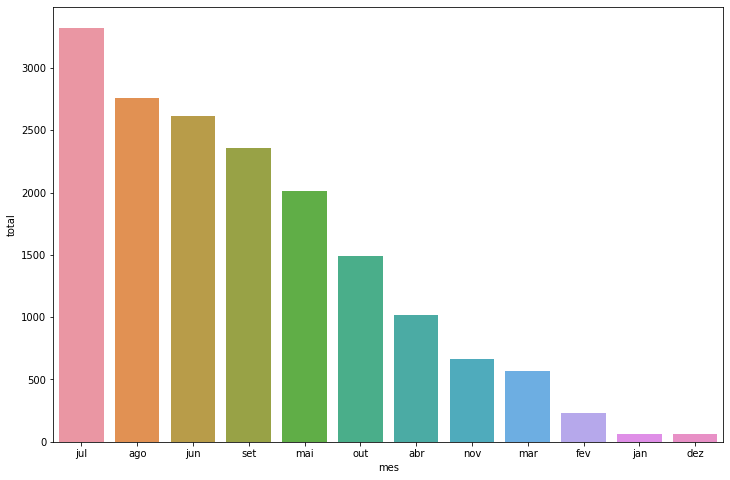

In [74]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (12 para direita e 8 para baixo)
sns.barplot(x="mes", y="total", data = freq_cust_mes_chicago)

In [75]:
#plt.figure(figsize=(10,6))
#sns.lineplot(data = freq_cust_mes_chicago, x="mes", y="total", color = "red") #Grafico de linha (em construção)

**Explorando de usuários Subscriber (cadastrado) por hora**

In [76]:
subscriber_chicago.hora.value_counts()

17    7034
8     5200
16    4957
18    4636
7     4119
19    3085
15    3038
12    2709
13    2642
9     2619
14    2414
11    2312
6     1975
10    1897
20    1896
21    1508
22     997
23     581
5      512
0      338
1      215
2      118
4      113
3       67
Name: hora, dtype: int64

In [77]:
freq_sub_hora_chicago = subscriber_chicago.hora.value_counts()

In [78]:
freq_sub_hora_chicago.to_frame() #Transforma uma serie em DataFrame

,hora
17,7034
8,5200
16,4957
18,4636
7,4119
19,3085
15,3038
12,2709
13,2642
9,2619


In [79]:
freq_sub_hora_chicago = freq_sub_hora_chicago.to_frame().reset_index()

In [80]:
freq_sub_hora_chicago.columns = ['hora', 'total']
freq_sub_hora_chicago

,hora,total
0,17,7034
1,8,5200
2,16,4957
3,18,4636
4,7,4119
5,19,3085
6,15,3038
7,12,2709
8,13,2642
9,9,2619


**Frequencia de usuários "Subscriber" por hora**

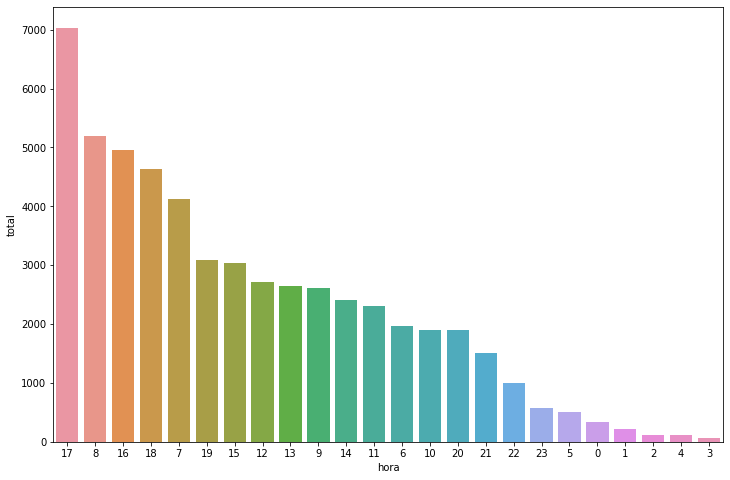

In [81]:
plt.figure(figsize=(12,8))
sns.barplot(x="hora", y="total", data = freq_sub_hora_chicago, order = subscriber_chicago['hora'].value_counts().index )

**Explorando de usuários Customer (visitantes) por hora**

In [82]:
customer_chicago.hora.value_counts()

14    1785
15    1701
13    1671
16    1665
17    1530
12    1499
11    1381
18    1150
10     923
19     820
20     623
9      571
21     417
22     349
8      254
23     241
0      144
7      137
1      111
2       57
6       49
5       26
4       24
3       21
Name: hora, dtype: int64

In [83]:
freq_cust_hora_chicago = customer_chicago.hora.value_counts()

In [84]:
freq_cust_hora_chicago.to_frame() #Transforma uma serie em DataFrame

,hora
14,1785
15,1701
13,1671
16,1665
17,1530
12,1499
11,1381
18,1150
10,923
19,820


In [85]:
freq_cust_hora_chicago = freq_cust_hora_chicago.to_frame().reset_index()

In [86]:
freq_cust_hora_chicago.columns = ['hora', 'total']
freq_cust_hora_chicago

,hora,total
0,14,1785
1,15,1701
2,13,1671
3,16,1665
4,17,1530
5,12,1499
6,11,1381
7,18,1150
8,10,923
9,19,820


**Frequencia de usuários "Customer" por hora**

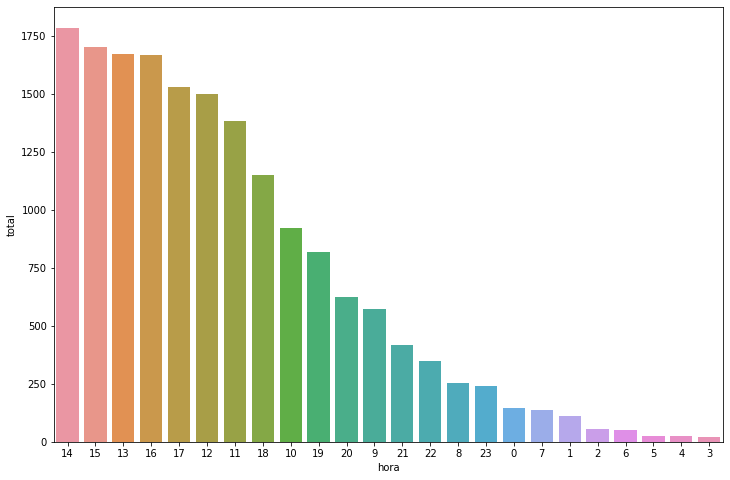

In [87]:
plt.figure(figsize=(12,8))
sns.barplot(x="hora", y="total", data = freq_cust_hora_chicago, order = customer_chicago['hora'].value_counts().index )

**Explorando de usuários (Subscriber) por dia da semana**

In [88]:
subscriber_chicago['dia_semana'].value_counts() #Utilizando o df subscriber_chicago que foi criado anteriormente

Tuesday      9356
Monday       8840
Friday       8648
Thursday     8643
Wednesday    8447
Saturday     5676
Sunday       5372
Name: dia_semana, dtype: int64

In [89]:
freq_sub_dia_chicago = subscriber_chicago['dia_semana'].value_counts()

In [90]:
freq_sub_dia_chicago

Tuesday      9356
Monday       8840
Friday       8648
Thursday     8643
Wednesday    8447
Saturday     5676
Sunday       5372
Name: dia_semana, dtype: int64

In [91]:
freq_sub_dia_chicago.to_frame().reset_index()

,index,dia_semana
0,Tuesday,9356
1,Monday,8840
2,Friday,8648
3,Thursday,8643
4,Wednesday,8447
5,Saturday,5676
6,Sunday,5372


In [92]:
freq_sub_dia_chicago = freq_sub_dia_chicago.to_frame().reset_index()

In [93]:
freq_sub_dia_chicago

,index,dia_semana
0,Tuesday,9356
1,Monday,8840
2,Friday,8648
3,Thursday,8643
4,Wednesday,8447
5,Saturday,5676
6,Sunday,5372


In [94]:
freq_sub_dia_chicago.columns = ['dia', 'total']
freq_sub_dia_chicago

,dia,total
0,Tuesday,9356
1,Monday,8840
2,Friday,8648
3,Thursday,8643
4,Wednesday,8447
5,Saturday,5676
6,Sunday,5372


**Frequencia de usuários (Subscriber) por dia da semana no ano**

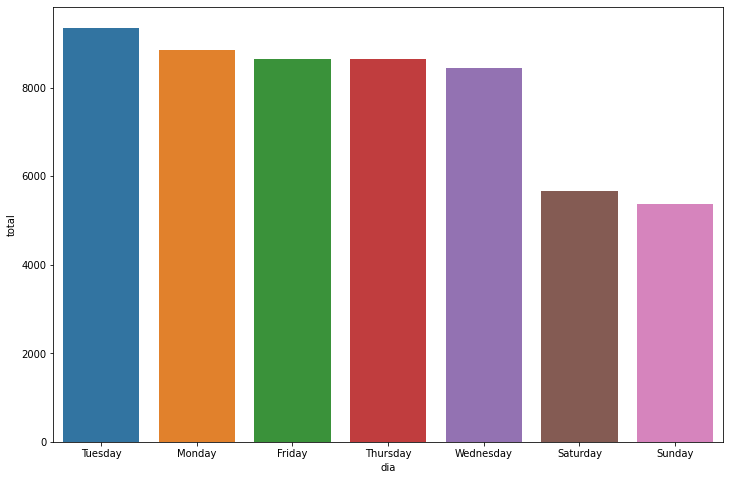

In [95]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = freq_sub_dia_chicago)

**Explorando usuários (Customer) por dia da semana**

In [96]:
customer_chicago['dia_semana'].value_counts() #Utilizando o df customer_chicago que foi criado anteriormente

Sunday       4282
Saturday     4251
Monday       2446
Friday       2093
Tuesday      1555
Thursday     1365
Wednesday    1157
Name: dia_semana, dtype: int64

In [97]:
freq_cust_dia_chicago = customer_chicago['dia_semana'].value_counts()

In [98]:
freq_cust_dia_chicago

Sunday       4282
Saturday     4251
Monday       2446
Friday       2093
Tuesday      1555
Thursday     1365
Wednesday    1157
Name: dia_semana, dtype: int64

In [99]:
freq_cust_dia_chicago.to_frame().reset_index()

,index,dia_semana
0,Sunday,4282
1,Saturday,4251
2,Monday,2446
3,Friday,2093
4,Tuesday,1555
5,Thursday,1365
6,Wednesday,1157


In [100]:
freq_cust_dia_chicago = freq_cust_dia_chicago.to_frame().reset_index()

In [101]:
freq_cust_dia_chicago

,index,dia_semana
0,Sunday,4282
1,Saturday,4251
2,Monday,2446
3,Friday,2093
4,Tuesday,1555
5,Thursday,1365
6,Wednesday,1157


In [102]:
freq_cust_dia_chicago.columns = ['dia', 'total']
freq_cust_dia_chicago

,dia,total
0,Sunday,4282
1,Saturday,4251
2,Monday,2446
3,Friday,2093
4,Tuesday,1555
5,Thursday,1365
6,Wednesday,1157


**Frequencia de usuários (Customer) por dia da semana no ano**



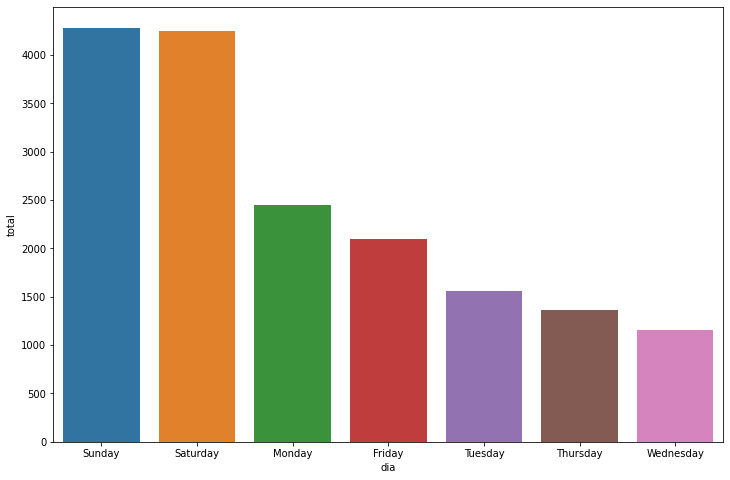

In [103]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = freq_cust_dia_chicago)

**Explorando os dias das semanas de cada mes de usuários Subscriber**

**Janeiro**

In [104]:
filtro_sub_jan_chicago = subscriber_chicago['mes'] == "jan"

In [105]:
filtro_sub_jan_chicago = subscriber_chicago[filtro_sub_jan_chicago]

In [106]:
filtro_sub_jan_chicago

,duracao,mes,hora,dia_semana,tipo_usuario
6114,3.133333e+16,jan,21,Sunday,Subscriber
6116,8.900000e+00,jan,20,Sunday,Subscriber
6117,4.533333e+15,jan,20,Sunday,Subscriber
6118,1.358333e+16,jan,19,Sunday,Subscriber
6119,5.750000e+00,jan,18,Sunday,Subscriber
...,...,...,...,...,...
8009,5.233333e+15,jan,10,Friday,Subscriber
8010,1.695000e+01,jan,3,Friday,Subscriber
8011,1.368333e+16,jan,1,Friday,Subscriber
8012,4.750000e+00,jan,1,Friday,Subscriber


In [108]:
filtro_sub_jan_chicago.dia_semana.value_counts()

Thursday     378
Friday       351
Tuesday      274
Wednesday    271
Monday       230
Saturday     202
Sunday       133
Name: dia_semana, dtype: int64

In [117]:
filtro_sub_jan_chicago = filtro_sub_jan_chicago.dia_semana.value_counts().to_frame().reset_index()

In [118]:
filtro_sub_jan_chicago

,index,dia_semana
0,Thursday,378
1,Friday,351
2,Tuesday,274
3,Wednesday,271
4,Monday,230
5,Saturday,202
6,Sunday,133


In [119]:
filtro_sub_jan_chicago.columns = ['dia', 'total']
filtro_sub_jan_chicago

,dia,total
0,Thursday,378
1,Friday,351
2,Tuesday,274
3,Wednesday,271
4,Monday,230
5,Saturday,202
6,Sunday,133


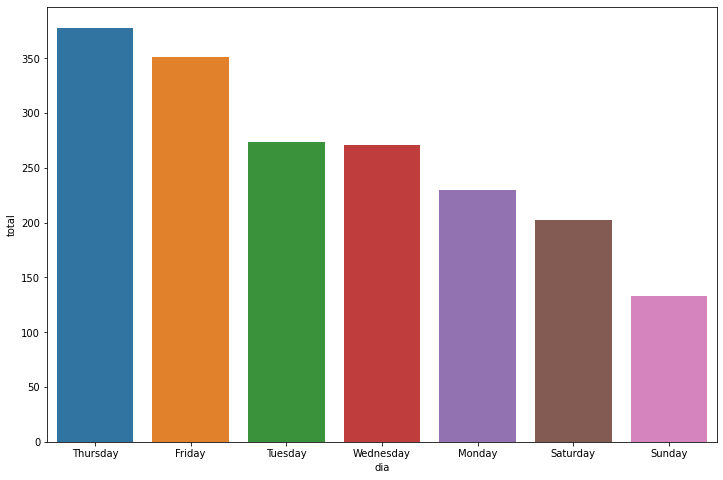

In [120]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_jan_chicago)

**Fevereiro**

In [113]:
filtro_sub_fev_chicago = subscriber_chicago['mes'] == "fev"

In [114]:
filtro_sub_fev_chicago = subscriber_chicago[filtro_sub_fev_chicago]

In [115]:
filtro_sub_fev_chicago

,duracao,mes,hora,dia_semana,tipo_usuario
3719,1.395000e+01,fev,22,Monday,Subscriber
3720,8.783333e+15,fev,20,Monday,Subscriber
3721,1.075000e+01,fev,20,Monday,Subscriber
3722,5.233333e+15,fev,19,Monday,Subscriber
3723,1.178333e+16,fev,19,Monday,Subscriber
...,...,...,...,...,...
6108,1.070000e+01,fev,6,Monday,Subscriber
6109,6.716667e+15,fev,6,Monday,Subscriber
6110,1.540000e+01,fev,6,Monday,Subscriber
6111,1.523333e+16,fev,5,Monday,Subscriber


In [116]:
filtro_sub_fev_chicago.dia_semana.value_counts()

Monday       428
Thursday     363
Friday       345
Tuesday      296
Wednesday    275
Saturday     261
Sunday       198
Name: dia_semana, dtype: int64

In [121]:
filtro_sub_fev_chicago = filtro_sub_fev_chicago.dia_semana.value_counts().to_frame().reset_index()

In [122]:
filtro_sub_fev_chicago

,index,dia_semana
0,Monday,428
1,Thursday,363
2,Friday,345
3,Tuesday,296
4,Wednesday,275
5,Saturday,261
6,Sunday,198


In [123]:
filtro_sub_fev_chicago.columns = ['dia', 'total']
filtro_sub_fev_chicago

,dia,total
0,Monday,428
1,Thursday,363
2,Friday,345
3,Tuesday,296
4,Wednesday,275
5,Saturday,261
6,Sunday,198


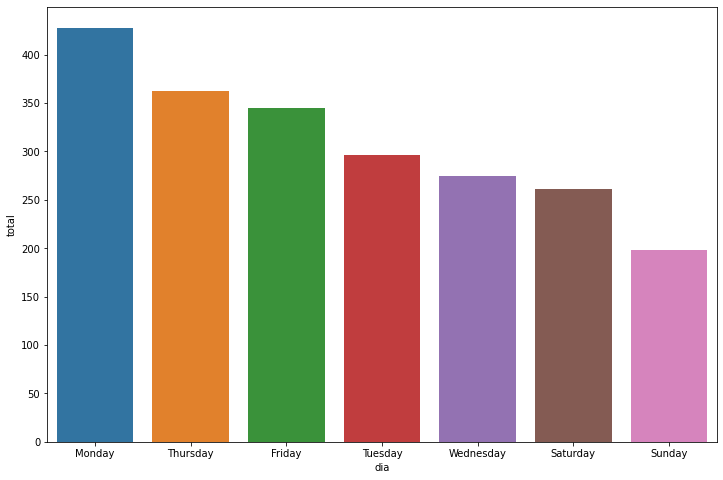

In [124]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_fev_chicago)

**Março**

In [125]:
filtro_sub_mar_chicago = subscriber_chicago['mes'] == "mar"

In [126]:
filtro_sub_mar_chicago = subscriber_chicago[filtro_sub_mar_chicago]

In [127]:
filtro_sub_mar_chicago

,duracao,mes,hora,dia_semana,tipo_usuario
0,1.543333e+16,mar,23,Thursday,Subscriber
1,3.300000e+00,mar,22,Thursday,Subscriber
2,2.066667e+15,mar,22,Thursday,Subscriber
3,1.968333e+16,mar,22,Thursday,Subscriber
4,1.093333e+16,mar,22,Thursday,Subscriber
...,...,...,...,...,...
3714,4.583333e+15,mar,7,Tuesday,Subscriber
3715,1.300000e+01,mar,7,Tuesday,Subscriber
3716,4.966667e+15,mar,7,Tuesday,Subscriber
3717,6.466667e+15,mar,7,Tuesday,Subscriber


In [128]:
filtro_sub_mar_chicago.dia_semana.value_counts()

Tuesday      666
Wednesday    579
Monday       511
Thursday     488
Friday       440
Saturday     285
Sunday       185
Name: dia_semana, dtype: int64

In [129]:
filtro_sub_mar_chicago = filtro_sub_mar_chicago.dia_semana.value_counts().to_frame().reset_index()

In [130]:
filtro_sub_mar_chicago

,index,dia_semana
0,Tuesday,666
1,Wednesday,579
2,Monday,511
3,Thursday,488
4,Friday,440
5,Saturday,285
6,Sunday,185


In [131]:
filtro_sub_mar_chicago.columns = ['dia', 'total']
filtro_sub_mar_chicago

,dia,total
0,Tuesday,666
1,Wednesday,579
2,Monday,511
3,Thursday,488
4,Friday,440
5,Saturday,285
6,Sunday,185


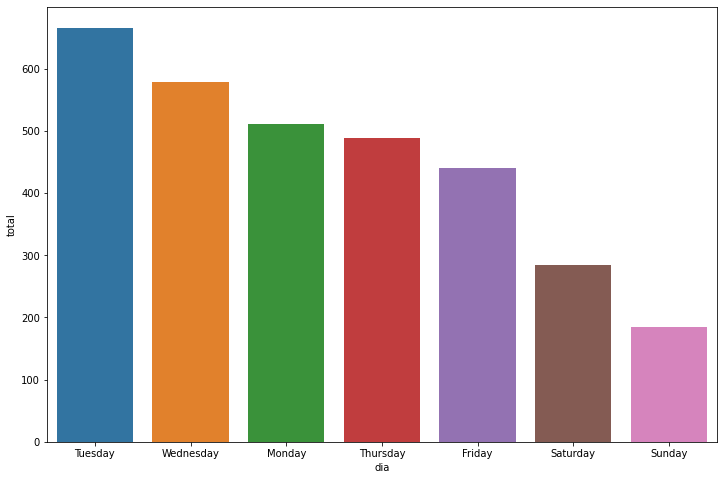

In [132]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_mar_chicago)